
## Natura del dataset

Il dataset è composto da circa 6700 righe e 6 colonne. Le informazioni riportate sono l'età delle persone, il loro gender, il livello di educazione, la mansione che hanno, gli anni di esperienza e il loro stipendio. Si vuole predire lo stipendio di queste persone.

Notebook di riferimento: https://github.com/Subash0812/ML-projects/blob/main/Salary_prediction/salary_prediction.ipynb


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
# read csv data
salary_df = pd.read_csv('Salary_Data.csv')
# show the head of the dataset
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# we can immediately show some insights about the data with Google Colab tools
# (if running on Colab)
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Individuiamo alcune informazioni riguardanti il DataFrame. Notiamo che le colonne Gender, Education Level e Job Title sono di tipo "object", ad indicare che contengono stringhe o dati categorici. Notiamo inoltre come le righe totali siamo *6704*, mentre , tra le colonne, ve ne sono alcune che hanno dei valori nulli. Ad esempio, sulla colonna Salary, notiamo che 6699 colonne sono con valori nulli, ossia, ci sono 5 entry con stipendio a null.

In [4]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## Data Preprocessing

### Count the missing values

Andiamo a calcolare esattamente quante sono, per ogni colonna, le entry che presentano valori nulli. Il primo metodo `isnull()` serve per tramutare il dataframe in un dataframe di valori boolean. La funzione `sum` somma questi valori per permetterci di vapire, per ogni colonna, quanti sono i dati nulli.

In [5]:
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

### Drop the null values
Usiamo `dropna` per eliminare tutte le righe che contengono anche solo un valore null. Il parametro `inplace` a `True` indica che la modifica è fatta sul dataframe originale, modificandolo, invece che restituirne uno nuovo (comportamento di default).

In [6]:
salary_df.dropna(inplace=True)

Mostriamo, con `describe`, alcune informazioni del dataframe dopo la pulitura. Adesso vi sono 6698 righe.

In [7]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [8]:
salary_df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Il campo `job title` è di tipo categorico nominale, pertanto possiamo listare tutti i valori distinti che compaiono in esso e, successivamente, quanti per ogni categoria ve ne sono.

In [9]:
# checking the unique values of job title
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [10]:
# checking the value counts
salary_df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [11]:
# creating the variable for reducing the number of job titles
job_title_stats = salary_df['Job Title'].value_counts() # get array (Series) with list of jobs and their count
job_title_stats_less_than_50 = job_title_stats[job_title_stats<=50] # take only the ones that are below 50
job_title_stats_less_than_50.count() # count them. They are 153

153

Tutti i lavori che appaiono con una frequenza di 50 o meno vengono clusterizzati nella categoria 'Others'

In [12]:
# reducing the number of job titles
salary_df['Job Title'] = salary_df['Job Title'].apply(lambda x: 'Others' if x in job_title_stats_less_than_50 else x )
# list the number of number of unique jobs in the dataframe now.
salary_df['Job Title'].nunique()

39

Ben 852 persone sono state raggruppate nella classe di lavoro "Other", come si vede qui sotto. Ora dobbiamo gestire solo 39 valori.

In [13]:
salary_df['Job Title'].value_counts().head()

Others                       852
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Name: Job Title, dtype: int64

Facciamo la stessa cosa per l'education level, guardando la lista di valori categorici diversi. Come si dota lo stesso valore e' ripetuto diversamente, come ad esempio PhD e phD, per probabili errori di battitura o inconsistenza nella maniera con cui i dati sono stati inseriti.

In [14]:
# checking unique values in education level
salary_df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Si fa pertanto un po' di pulizia, rimpiazzando i valori con un valore standard deciso da noi.

In [15]:
salary_df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
salary_df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

Essendo solo 4 classi, non serve troncarli come nel caso dei lavori. Facciamo lo stesso per il gender:

In [16]:
salary_df["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
salary_df["Gender"].value_counts()

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

Come si vede vi sono solo 3 classi, con 2 di esse abbastanza bilanciate e la terza, Other, che presenta 14 entry.

## Exploratory Data Analysis

### Distribution of the categorical variables

Osserviamo come alcune delle variabili categoriche che abbiamo si possono distribuire. Come abbiamo già osservato, le classi Male e Female sono relativamente simili, sebbene Male presenta più sample. Nel caso dell'educazione, si ha una preponderanza di Bachelor degree, seguiti da Master, dai PhD e da una sparuta ma pur presente quantità di persone che hanno frequentato solo la scuola superiore.

Riassumendo, la maggioranza dei dipendenti è uomo, e la maggioranza dei dipendenti ha la laurea triennale.

<Axes: xlabel='Education Level', ylabel='count'>

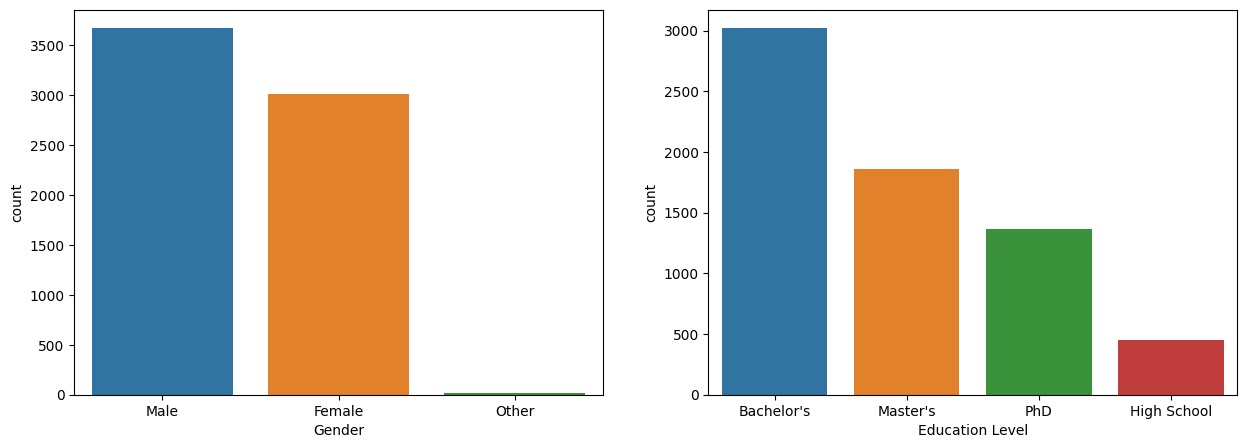

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=salary_df,ax = ax[0])
sns.countplot(x='Education Level',data = salary_df,ax=ax[1])

### Distribution of continuous variables

Facciamo lo stesso, ma per le feature numeriche. Da queste osserviamo che c'è una certa preponderanza di dipendenti più giovani (la media è sui 33 anni, come visto prima), hanno ancora relativamente poca esperienza (media di 8 anni), ma un salario piuttosto distribuito, con una media di 115K, con un 75 percentile di 116K e un max attorno ai 220K.

<Axes: xlabel='Salary', ylabel='Count'>

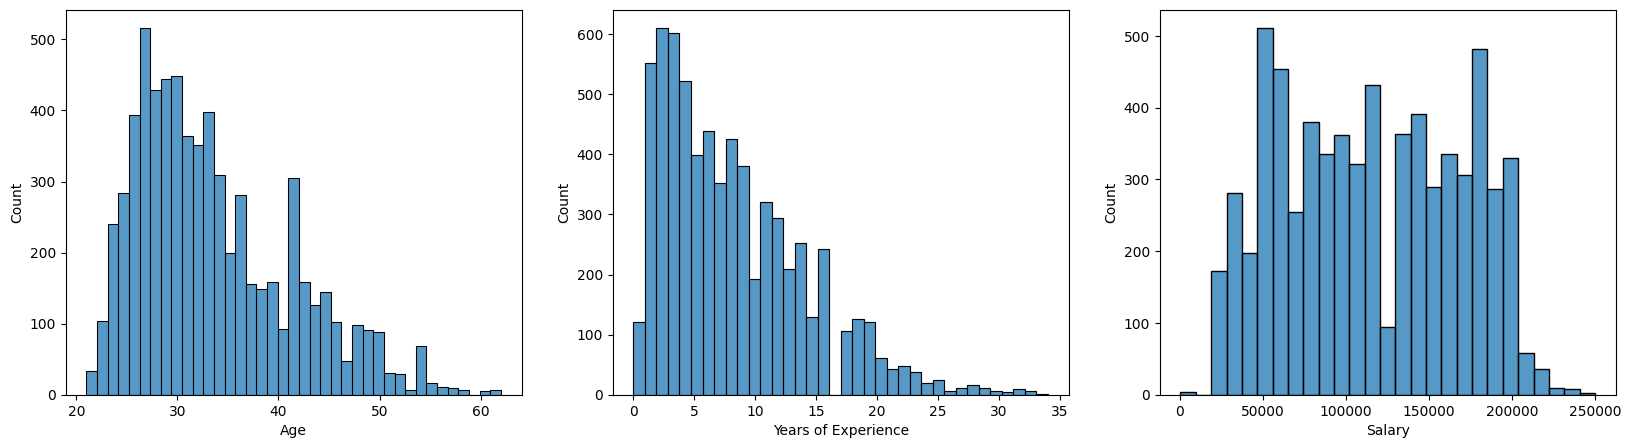

In [19]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(salary_df['Age'],ax=ax[0])
sns.histplot(salary_df['Years of Experience'],ax=ax[1])
sns.histplot(salary_df['Salary'],ax=ax[2])

#### Top Highest Paid jobs

[Text(0.5, 1.0, 'Top 10 Highest paid jobs')]

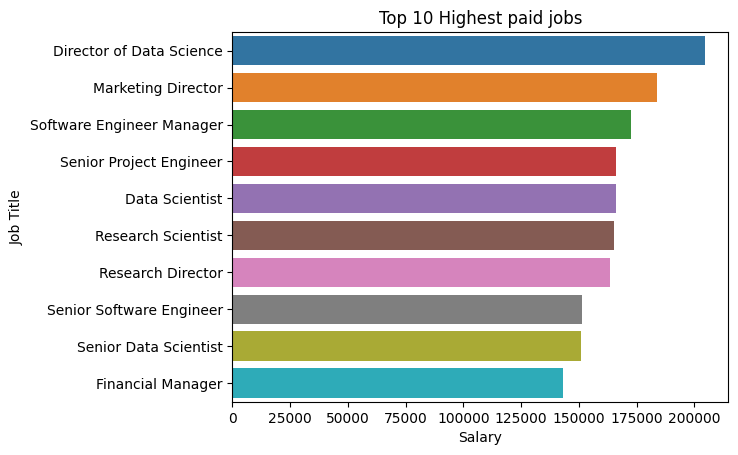

In [20]:
# compute the mean average salary for each Job Title - create a new dataframe
mean_salary_by_job = salary_df.groupby('Job Title')['Salary'].mean().reset_index()
# sort the data and put the result in a new dataframe
sorted_data = mean_salary_by_job.sort_values(by='Salary',ascending=False)
sns.barplot(x='Salary',y='Job Title',data=sorted_data.head(10)).set(title='Top 10 Highest paid jobs')

### Relationship with Target variable

In questi plot mostriamo la distribuzione di stipendio in base al gender. Si vede che i dipendenti maschi hanno uno stipendio in media piu' alto rispetto alle donne, mentre i dipendenti di gender "other" hanno lo stipendio piu' alto in assoluto in media, sebbene siano di meno in numero.

Il boxplot della seconda figura mostra come i dipendenti che hanno un dottorato abbiano un salario mediano piu' alto (con degli outlier interessanti per quel che riguarda stipendi bassi, tuttavia)

[Text(0.5, 1.0, 'Relationship between Education Level and Salary')]

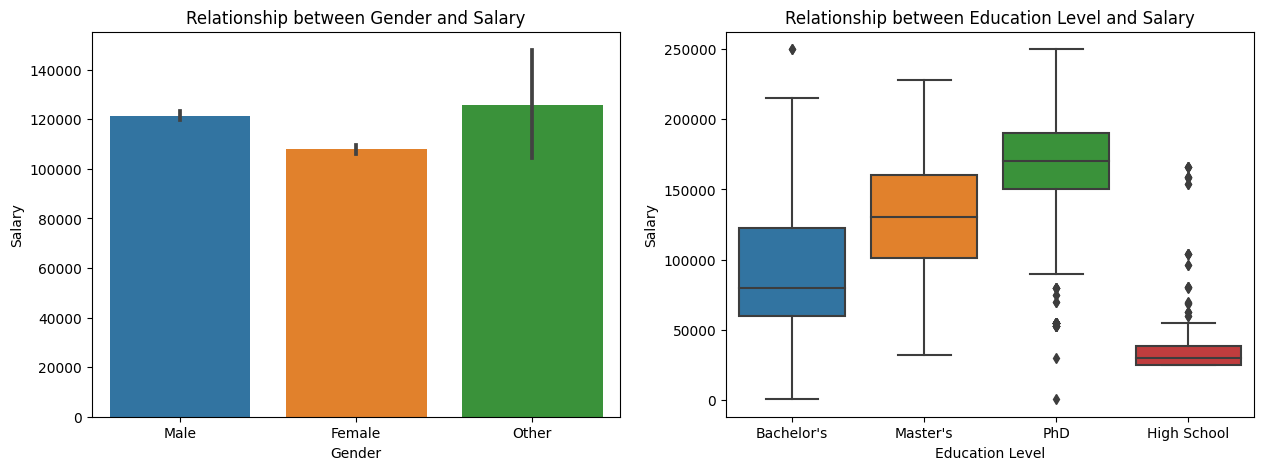

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Gender',y='Salary',data=salary_df,ax=ax[0]).set(title='Relationship between Gender and Salary')
sns.boxplot(x='Education Level',y='Salary',data=salary_df,ax=ax[1]).set(title='Relationship between Education Level and Salary')


In quest'altro lot mostriamo il livello di salario in base al grado di educazione e in base ai generi. Si nota che in tutti i livelli di educazione i maschi guadagnano di più rispetto alle donne. Il genere "other" guadagna di più per quel che riguarda l'high school e il Master degree.

[Text(0.5, 1.0, 'Education level vs Salary vs Gender')]

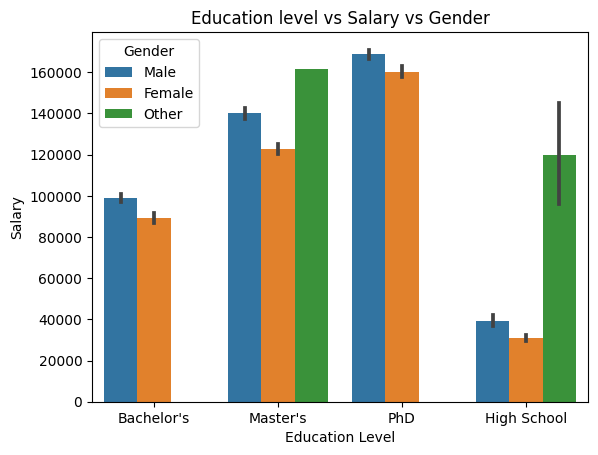

In [22]:
sns.barplot(x='Education Level',y='Salary',data=salary_df,hue='Gender').set(title='Education level vs Salary vs Gender')

[Text(0.5, 1.0, 'Relationship between Age and Salary')]

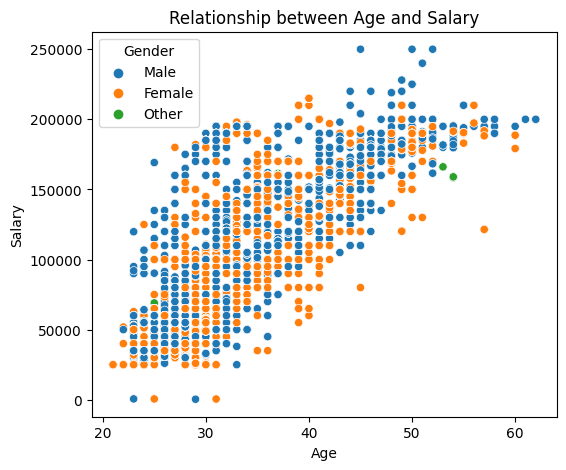

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Age and Salary')

Questo scatterplot mostra la relazione tra l'età dei dipendenti e il loro salario. Si nota una relazione circa lineare per cui all'aumentare dell'età aumenta anche il salario.

[Text(0.5, 1.0, 'Relationship between Experience and Salary')]

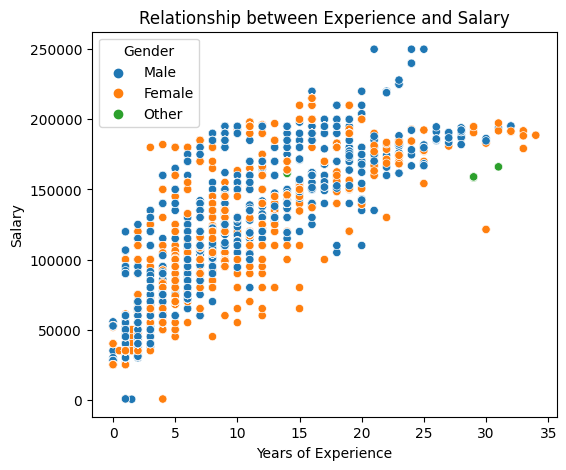

In [24]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Years of Experience',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Experience and Salary')

Infine, abbiamo fatto uno scatterplot similare basato però sull'evoluzione dello stipendio in base all'età. Si nota che anche qui che all'aumentare degli anni di esperienza il salatio a sua volta aumenta.

## Data Preprocessing (continued)

### Detecting the Outliers

Partiamo cercando di individuare gli outlier nella colonna `Salary`, in quanto essa sarà la nostra label feature.

Si sfrutta per questo the **Interquartile Range (IQR) method**, un metodo statistico utilizzato per identificare gli outlier in un dataset. Per identificare questi outlier, sfrutta lo *spread* dei dati all'interno del 50% di osservazioni "interno" ai dati. L'Interquartile Range è esattamente l'ampiezza del range in cui si trova il 50% dei dati che si trovano in mezzo ai campioni ordinati. Un upper bound ed un lower bound vengono calcolati, e tutti i dati che cadono al di fuori di questi bound vengono considerati come potenziali outliers.

In [25]:
# detecting the outliers in salary column using IQR method
Q1 = salary_df.Salary.quantile(0.25) # get first quartile
Q3 = salary_df.Salary.quantile(0.75) # get third quartile
IQR = Q3-Q1 # compute the interquartile range
lower = Q1-1.5*IQR # lower bound
upper = Q3+1.5*IQR # upper bound

In [26]:
print(lower, upper)

-65000.0 295000.0


Controlliamo ora se ci sono effettivamente outlier usando i due bound individuati tramite il metodo IQR.

In [27]:
salary_df[salary_df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [28]:
salary_df[salary_df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


Come si nota da queste ultime due celle, non ci sono outlier in questo dataset.

### Feature scaling

Parte del grande mondo del feature engineering è il passo di **feature scaling**, necessario in quanto molti algoritmi di ML sono sensibili allo scale delle input features.

Notiamo che, tra i modelli che usiamo più sotto, vi sono le **random forest** e i **decision trees**, i quali, di per sé, sono **scale invariant**. Per quel che riguarda la Linear Regression, invece, è auspicabile usare la normalizzazione. Siccome i dati non presentano outliers ed hanno una disribuzione parzialmente skewed, usiamo il Min-Max scaling.

In [29]:
scaler = MinMaxScaler()
salary_df[['Age', 'Years of Experience']] = scaler.fit_transform(salary_df[['Age', 'Years of Experience']])

In [30]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.268293,Male,Bachelor's,Software Engineer,0.147059,90000.0
1,0.170732,Female,Master's,Data Analyst,0.088235,65000.0
2,0.585366,Male,PhD,Others,0.441176,150000.0
3,0.365854,Female,Bachelor's,Sales Associate,0.205882,60000.0
4,0.756098,Male,Master's,Others,0.588235,200000.0


### Label encoding

Dobbiamo ancora mappare le feature categoriche su dei numeri. Nel caso del livello di educazione il dato categorico può essere considerato ordinale. Per questo possiamo mapparlo in una scala di interi da 0 a 3 dove 0 corrisponde al livello di educazione più basso nel dataset, la scuola superiore, e 3 è il dottorato.

In [31]:
# Mapping Education Level column
education_mapping = {"High School":0,"Bachelor's":1,"Master's":2,"PhD":3}
salary_df['Education Level'] = salary_df['Education Level'].map(education_mapping)

Ora passiamo al gender.

Per la mappatura, solo per questioni didattiche, mostriamo qui la classe `LabelEncoder` di sklearn, tipicamente usata per il label encoding di variabili categoriche. Il metodo `fit_transform` permette alla classe di apprendere l'encoding per questa feature e di applicarlo. Come vediamo i valori sono sostituiti con tre interi: 0, 1 e 2. Come tale, stiamo introducendo un ordinamento all'interno delle feature, la qual cosa potrebbe risultare controproducente con modelli linear. Pertanto, il vero encoding verrà fatto tramite tramite one hot-vector nelle prossime celle.

In [32]:
# Label encoding the catogorical variable
# le = LabelEncoder()
# salary_df['Gender'] = le.fit_transform(salary_df['Gender'])

In [33]:
salary_df['Gender'].value_counts()

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

<Axes: >

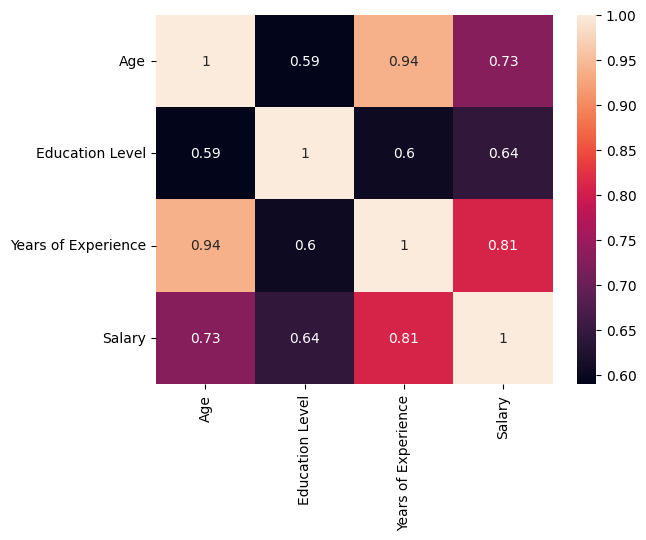

In [34]:
# Correlation plot
sns.heatmap(salary_df.corr(),annot = True)

Da questa heatmap è possibile verificare che il salario è altamente correlato con l'età, il livello di educazione e soprattutto con gli anni di esperienza.

### N-1 encoding

Per quel che riguarda il `Job Title`, in questo caso abbiamo molti più valori dei quali fare l'encoding. Per questo si sfrutta la tecnica `one-hot encoding`.

Si utilizza per prima cosa il metodo `get_dummies` per ottenere delle variabili dummes per la colonna Job Title. Ossia, la colonna è trasformata in una serie di colonne binarie che assumono solo valori 0 o 1. Il parametro `drop_first` è posto a True per evitare la multicollinearità durante la regressione evitando di inserire la prima colonna, in quanto essa è perfettamente inferibile dal fatto che, quanto tocca a lei assumere valore 1, tutte le altre variabili sono a 0. Questo è un esetpio di perfect multicollinearity. In questo caso, diciamo che stiamo applicando il **N-1 encoding**.

In [35]:
# Creating dummies for Job titles
dummies = pd.get_dummies(salary_df['Job Title'],drop_first=True) # apply N-1 encoding

In [46]:
dummies.head(5)

,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,Director of HR,Director of Marketing,Financial Manager,Front end Developer,Full Stack Engineer,...,Sales Director,Sales Manager,Senior Data Scientist,Senior Product Marketing Manager,Senior Project Engineer,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Aggiungiamo i nuovi N-1 encodings al dataframe e rimuoviamo la vecchia colonna `Job title`, che ora non ci serve più.

In [37]:
salary_df = pd.concat([salary_df,dummies],axis=1)
salary_df.drop('Job Title',inplace=True,axis=1)
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,...,Sales Director,Sales Manager,Senior Data Scientist,Senior Product Marketing Manager,Senior Project Engineer,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,0.268293,Male,1,0.147059,90000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.170732,Female,2,0.088235,65000.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.585366,Male,3,0.441176,150000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.365854,Female,1,0.205882,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.756098,Male,2,0.588235,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Facciamo la stessa cosa con la feature `Gender`.

In [49]:
gender_dummies = pd.get_dummies(salary_df['Gender'], drop_first='True')
gender_dummies.head(5)

,Male,Other
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0


In [50]:
salary_df = pd.concat([salary_df,gender_dummies],axis=1)
salary_df.drop('Gender',inplace=True,axis=1)
salary_df.head(5)

,Age,Education Level,Years of Experience,Salary,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,Director of HR,...,Senior Data Scientist,Senior Product Marketing Manager,Senior Project Engineer,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer,Male,Other
0,0.268293,1,0.147059,90000.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0.170732,2,0.088235,65000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.585366,3,0.441176,150000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.365854,1,0.205882,60000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.756098,2,0.588235,200000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Separiamo ora il dataset tra le feature e la variabile target.

In [51]:
# Separate the dataset into features and target
features = salary_df.drop('Salary',axis=1)
target = salary_df['Salary']

## Train Test Split

Molto semplicemente, usiamo il metodo di `sklearn` per la divisione. La divisione è fatta con uno split del 75/25 tra train e test.

In [52]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)

In [53]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(5023, 43) (5023,) (1675, 43) (1675,)


## Salary Prediction

Finalmente possiamo procedere con il training del modello. Volendo utilizzare più di un modello per la predizione per poi confrontarli, e volendo utilizzare grid search per trovare il migliore tra di loro, definiamo in un dizionario Python gli iperparametri che vogliamo utilizzare per il tuning dei modelli. Ne utilizziamo tre: la linear regression (che non ha iperparametri), un decision tree (che come parametri ha la massima profondità e il min samples split, e la random forest, dove andiamo ad indicare il numero di alberi utilizzati.

In [54]:
# Create a dictionary for hyperparameter tuning
model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{

        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

Eseguiamo adesso la grid search, la quale fa utilizzo della cross validation. Usiamo ome k della cross validation 5. L'oggetto clf implementa la grid search sul dataset di train e ritorna, per ogni modello, il miglior set di parametri trovati tramite la grid search, assieme al *negative mean squared error*. La random forest presenta il negative mean squared error maggiore, il che corrisponde al valore di MSE minore.

In [55]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items(): # for each available model
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)

    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-4.723479e+08
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.505929e+08
2,Random_Forest,{'n_estimators': 80},-6.771544e+07


In [56]:
# Order of the best models
s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,{'n_estimators': 80},-6.771544e+07
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 5, 'ran...",-1.505929e+08
0,Linear_Regression,{},-4.723479e+08


In altre parole, la Random forest è, tra i modelli testati, quello che permette di ottenere le prestazioni migliori. Andiamo ad utilizzare e valutare questo.

## Model Evaluation

Come metriche per valutare i modelli usiamo le seguenti:

- MSE Mean Squared Error, una metrica che calcola la media delle differenze tra il valore predetto e il valore reale elevato alla seconda.

$MSE = (1/n) * Σ(y_i - ŷ_i)^2$

- MAE Mean Absolute Error. Calcola la media delle differenze assolute tra i valori predetti e quelli reali. Non elevando alla seconda, enfatizza di meno gli errori dovuti ad outlier.
Reppresenta direttamente la media dell'errore assoluto, ed ha la stessa unita' di misura della variabile target.

$MAE = (1/n) * Σ|y_i - ŷ_i|$

- RMSE Root Mean Squared Error. Una metrica derivante dall'MSE. ha la stessa unita' di misura della variabile target, il che lo rende piu' semplice da interpretare. Enfatizza anche lui gli errori piu' grandi ed e' quindi piu' sensibile agli outlier.

$RMSE = √(MSE) = √[(1/n) * Σ(y_i - ŷ_i)^2]$

### Random Forest

Avendo allenato la RF con la grid search, andiamo ad allenare il modello utilizzando il numero di estimator indicatoci dalla cross validation.

In [61]:
# Random Forest model
rfr = RandomForestRegressor(n_estimators=80)
rfr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=80)

In [70]:
# compute accuracy of Random Forest model
rfr.score(x_test,y_test)

0.9716996368034446

In [71]:
# get the predicted labels
y_pred_rfr = rfr.predict(x_test)

In [72]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr,squared=False))

Mean Squared Error : 80692201.94919732
Mean Absolute Error : 3516.571836990981
Root Mean Squared Error : 8982.883832556076


Guardiamo ora anche agli altri modelli che abbiamo identificato, sebbene la cross validation li abbia esclusi, e guardiamo ai loro errori.

### Decision Tree Model

In [65]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [66]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [73]:
dtr.score(x_test, y_test)

0.9449475893373321

In [74]:
y_pred_dtr = dtr.predict(x_test)

In [84]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr,squared=False))

Mean Squared Error : 156969725.37521473
Mean Absolute Error : 7296.674008347481
Root Mean Squared Error : 12528.755938847828


### Linear Regression

In [77]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [79]:
lr.score(x_test, y_test)

0.8293174576291265

In [85]:
y_pred_lr = lr.predict(x_test)

In [86]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_lr,squared=False))

Mean Squared Error : 486663371.8633448
Mean Absolute Error : 16304.63247705218
Root Mean Squared Error : 22060.44813378334


## Conclusioni

Tra i 3 modelli testati la Random Forest appare quella che performa meglio in termini di R2 score e anche in base alle altre metriche scelte.

La sua accuracy e' la piu' elevata, con un valore di 97.16%.

Il decision tree ha comunque una buona accuracy, del 94.49%.

Infine, il modello di Regressione Lineare ha lo score minore, con una accuracy dell'82.93%.